In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the seismic data from the CSV file
data= pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.drop('id',axis=1, inplace=True)

In [7]:
#checking for categorical and numerical values in the dataset
num= data.select_dtypes(include = 'number')
cat= data.select_dtypes(exclude = 'number')

print(f'numerical variables')
display(num.head())
print(f'\n\ncaegorical variables')
display(cat.head())

numerical variables


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1




caegorical variables


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [8]:
for i in num.columns:
    if i in data.columns:
        data[i].fillna(data[i].median(), inplace = True)
for i in cat.columns:
    if i in data.columns:
        data[i].fillna(data[i].mode()[0], inplace = True)

data.isnull().sum().sort_values(ascending = False)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

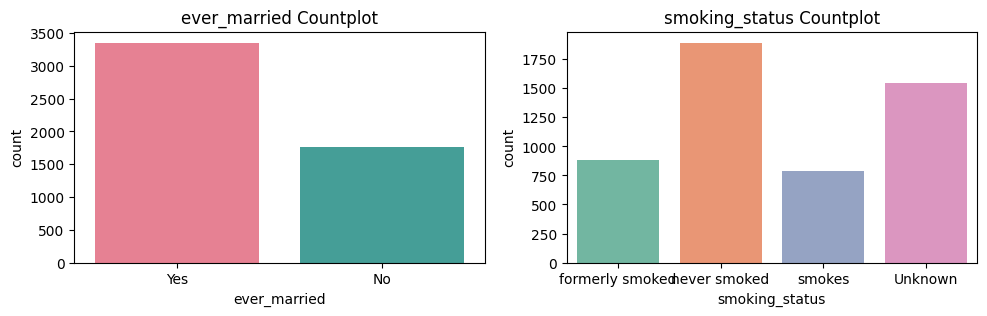

In [9]:
def cat_Plotter(dataframe, a, b, ):
    plt.figure(figsize = (18, 3))

    plt.subplot(1, 3, 1)
    sns.countplot(x = dataframe[a], palette = 'husl')
    plt.title(f'{a} Countplot')

    plt.subplot(1, 3, 2)
    sns.countplot(x = dataframe[b], palette = 'Set2')
    plt.title(f'{b} Countplot')

cat_Plotter(data,'ever_married','smoking_status')

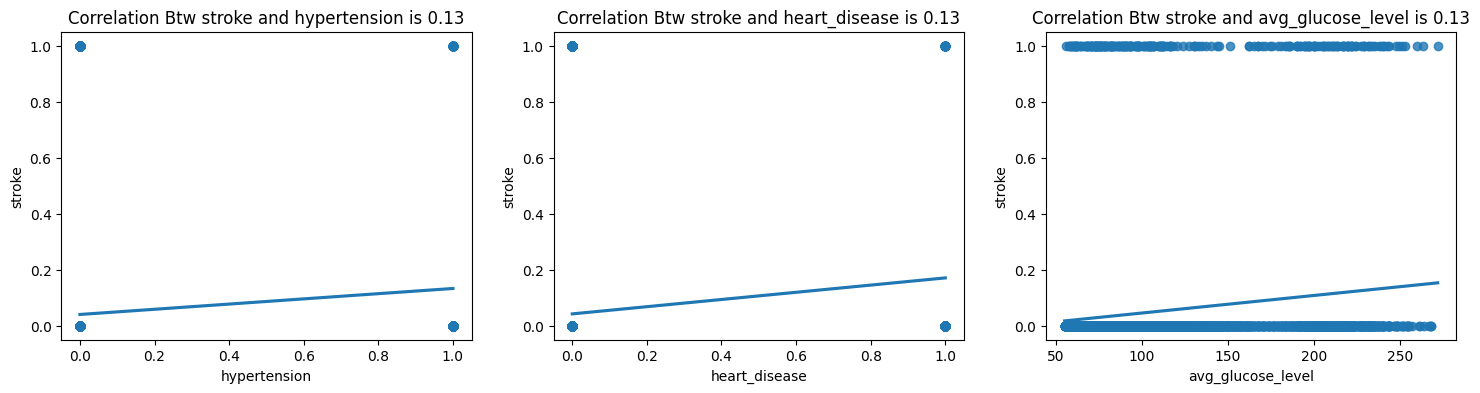

In [10]:
def plotter(data, a, b, c, dependent):
    plt.figure(figsize = (18, 4))

    plt.subplot(1, 3, 1)
    sns.regplot(y = data[dependent], x = data[a], ci = 0)
    plt.title(f"Correlation Btw stroke and {a} is {(data[dependent].corr(data[a]).round(2))}")

    plt.subplot(1, 3, 2)
    sns.regplot(y = data[dependent], x = data[b], ci = 0)
    plt.title(f"Correlation Btw stroke and {b} is {(data[dependent].corr(data[b]).round(2))}")

    plt.subplot(1, 3, 3)
    sns.regplot(y = data[dependent], x = data[c], ci = 0)
    plt.title(f"Correlation Btw stroke and {c} is {(data[dependent].corr(data[c]).round(2))}")

plotter(data, 'hypertension'	,'heart_disease',	'avg_glucose_level','stroke')

In [11]:
# convert all text columns to numbers
# scale the data so they have lesser range of values

from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()

# copy your data
new_data = data.copy()

# Encode the categorical data set
for i in cat:
    if i in new_data.columns:
        new_data[i] = encoder.fit_transform(new_data[i])

new_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


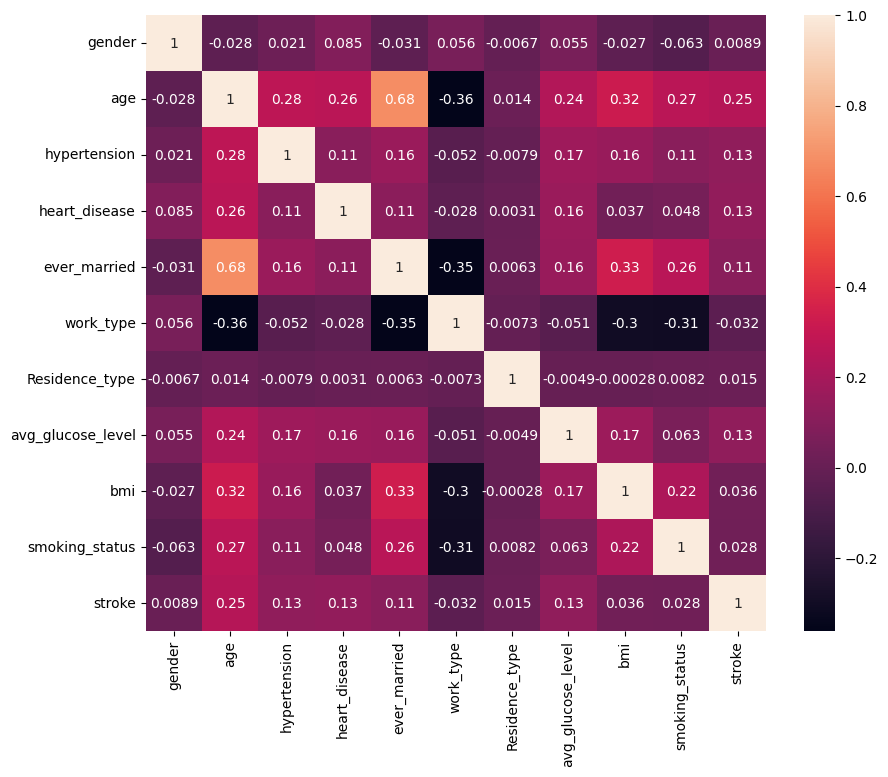

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(new_data.corr(), annot=True)
plt.show()

In [13]:
# Convert 'age' and 'bmi' columns to integers
new_data['age'] =new_data['age'].astype(int)
new_data['bmi'] =new_data['bmi'].astype(int)

In [14]:
new_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36,1,1
1,0,61,0,0,1,3,0,202.21,28,2,1
2,1,80,0,1,1,2,0,105.92,32,2,1
3,0,49,0,0,1,2,1,171.23,34,3,1
4,0,79,1,0,1,3,0,174.12,24,2,1


In [15]:
import pickle
pickle.dump(encoder, open('encoder.pkl', "wb"))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

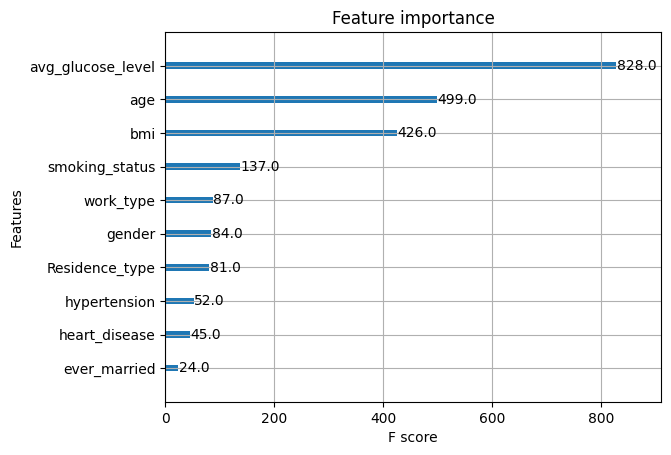

In [16]:
# - Using XGBOOST to find feature importance
x = new_data.drop('stroke', axis = 1)
y = new_data['stroke']

import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [17]:
sel_columns = ['age','smoking_status', 'avg_glucose_level', 'gender', 'heart_disease', 'bmi', 'stroke']

new_data = new_data[sel_columns]
new_data.head()

,age,smoking_status,avg_glucose_level,gender,heart_disease,bmi,stroke
0,67,1,228.69,1,1,36,1
1,61,2,202.21,0,0,28,1
2,80,2,105.92,1,1,32,1
3,49,3,171.23,0,0,34,1
4,79,2,174.12,0,0,24,1


In [18]:
new_data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

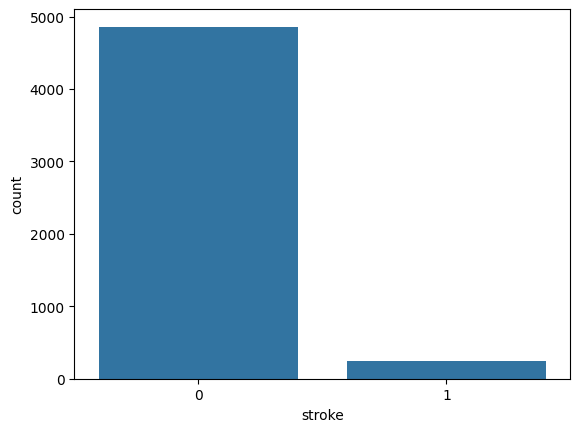

In [19]:
sns.countplot(x = new_data.stroke)

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy= 'auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='stroke', ylabel='count'>

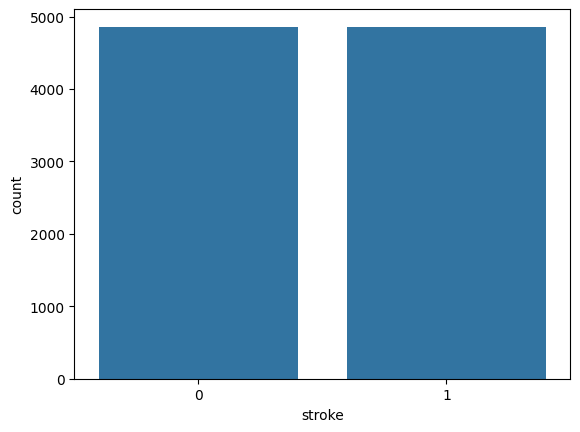

In [21]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['stroke'])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = new_balanced_data_smote.drop('stroke', axis = 1)
y = new_balanced_data_smote.stroke

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [23]:
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)

cross_val = logreg.predict(X_resampled)
print(classification_report(cross_val, y_resampled))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4665
           1       0.82      0.79      0.81      5057

    accuracy                           0.80      9722
   macro avg       0.80      0.80      0.80      9722
weighted avg       0.80      0.80      0.80      9722



<Axes: >

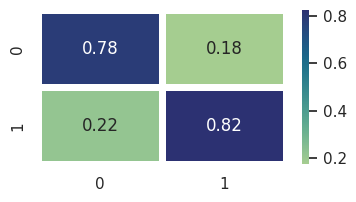

In [24]:
revealer = confusion_matrix(cross_val, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       930
           1       0.83      0.79      0.81      1015

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945



<Axes: >

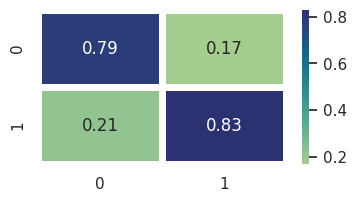

In [25]:
# Evaluating the test set
test_pred = logreg.predict(xtest)

print(classification_report(test_pred, ytest))

revealer = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/sum(revealer), annot=True, cmap='crest', linewidth=5)

In [26]:
# Export the model
import pickle
pickle.dump(logreg, open('stroke.pkl', "wb"))

In [28]:
# Load the model you saved and use it for prediction
model = pickle.load(open('/content/stroke.pkl', "rb")) # --------------- Load the model
prediction = model.predict([[67.0, 0, 1, 228.69, 36.6,1,2,6,8,54]])

print(f"Prediction: {prediction[0].round(2)}")

Prediction: 0
